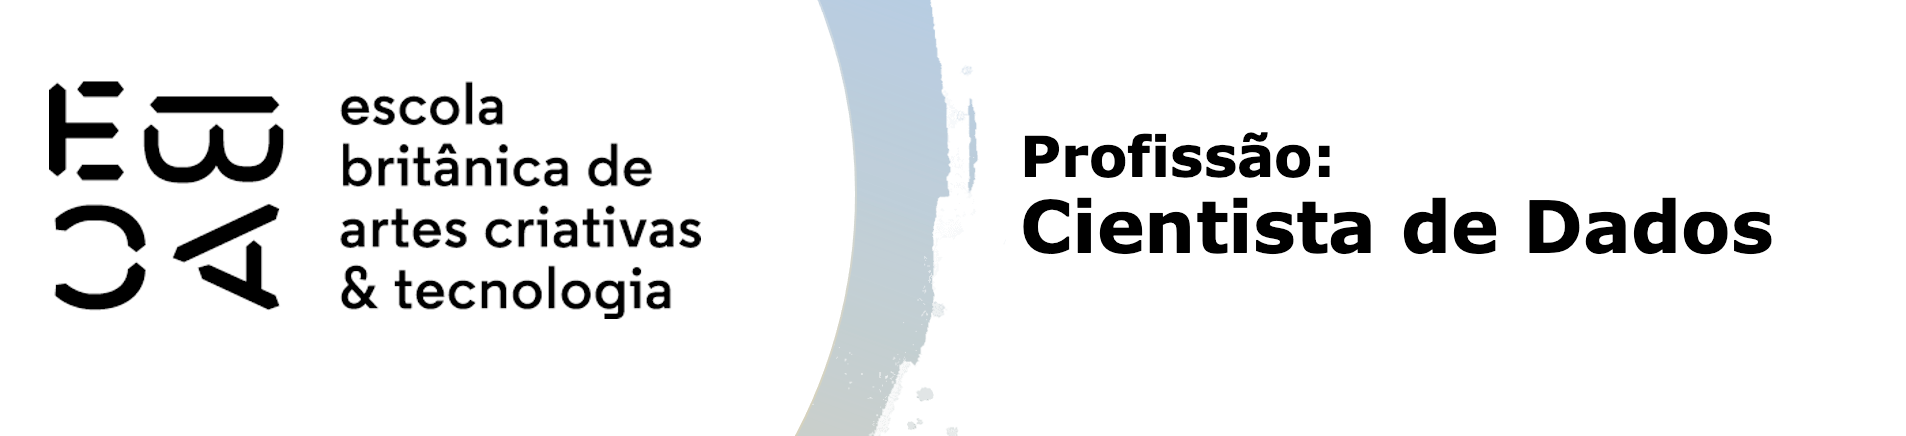

# **Módulo 36** | Descritiva IV
Caderno de **exercício 02**<br>



## Discente: Samuel Saturno

Ainda sobre a base da NFP vista na tarefa passada:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

## Importando as Bibliotecas 

In [1]:
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import numpy             as np
import warnings;   warnings.filterwarnings("ignore")

/home/sos/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Carregando o DataFrame

In [2]:
# Carrega o DataFrame a partir de um arquivo pickle
df = pd.read_pickle('base_nfp.pkl')

# Define a coluna 'Data Emissão' como o índice
df.set_index('Data Emissão', inplace=True)

# Filtra o DataFrame para incluir apenas as linhas a partir de 1º de janeiro de 2020
df_2020 = df['2020-01-01':]

# Remove as linhas com qualquer valor ausente
df_2020.dropna(inplace=True)

# Redefine o índice para transformar a coluna 'Data Emissão' de volta em uma coluna regular
df_2020.reset_index(inplace=True)

# Exibe as primeiras linhas do DataFrame
df_2020.head()


,Data Emissão,CNPJ emit.,Emitente,No.,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,2020-01-01,05.234.750/0001-41,TX BURGER LTDA,77882,78.80,2020-08-01,0.0,A Calcular,2019,2,0.0,0,não definido
1,2020-01-01,47.508.411/1476-88,CIA BRASILEIRA DE DISTRIBUICAO,20087,22.71,2020-01-01,0.0,A Calcular,2019,2,0.0,0,Mercado
2,2020-01-01,09.060.964/0108-39,PIMENTA VERDE ALIMENTOS LTDA,82366,35.90,2020-08-01,0.0,A Calcular,2019,2,0.0,0,Alimentos
3,2020-01-01,61.412.110/0307-39,DROGARIA SAO PAULO S A,234178,21.77,2020-08-01,0.0,A Calcular,2019,2,0.0,0,Farmácia
4,2020-01-01,46.952.032/0001-98,PANIFICADORA E CONFEITARIA QUELUZ LTDA,3305,80.95,2020-08-01,0.0,A Calcular,2019,2,0.0,0,Restaurantes


## Criando variáveis

**Variáveis temporais**: É possível que haja alguma regra de liberação de créditos de acordo com o dia do mês, o dia da semana, fim de semana (sim ou não), ou até alterações temporais da regra. Vamos criar as seguintes variáveis para testar estas hipóteses:

- Dia da semana
- Dummy para fim de semana
- Dia do mês
- Mês (já na base)
- Trimestre
- Ano (já na base)

In [3]:
# Adiciona uma coluna 'dia_de_semana' com o nome do dia da semana da 'Data Emissão'
df_2020['dia_de_semana'] = df_2020['Data Emissão'].dt.day_name()

# Adiciona uma coluna 'fim_de_semana' indicando se o dia é fim de semana (sábado ou domingo)
# A expressão (df_2020['Data Emissão'].dt.dayofweek // 5 == 1) retorna True para fim de semana e False para dias de semana
# Convertendo o booleano para float, onde True se torna 1.0 e False se torna 0.0
df_2020['fim_de_semana'] = ((df_2020['Data Emissão'].dt.dayofweek) // 5 == 1).astype(float)

# Adiciona uma coluna 'dia_mes' com o dia do mês da 'Data Emissão'
df_2020['dia_mes'] = df_2020['Data Emissão'].dt.day

# Adiciona uma coluna 'mes' com o mês da 'Data Emissão'
df_2020['mes'] = df_2020['Data Emissão'].dt.month

# Adiciona uma coluna 'trimestre' com o trimestre do ano da 'Data Emissão'
df_2020['trimestre'] = df_2020['Data Emissão'].dt.quarter

# Adiciona uma coluna 'Ano' com o ano da 'Data Emissão'
df_2020['Ano'] = df_2020['Data Emissão'].dt.year

# Exibe as primeiras linhas do DataFrame para verificar as novas colunas
df_2020.head()


,Data Emissão,CNPJ emit.,Emitente,No.,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria,dia_de_semana,fim_de_semana,dia_mes,mes,trimestre
0,2020-01-01,05.234.750/0001-41,TX BURGER LTDA,77882,78.80,2020-08-01,0.0,A Calcular,2020,2,0.0,0,não definido,Wednesday,0.0,1,1,1
1,2020-01-01,47.508.411/1476-88,CIA BRASILEIRA DE DISTRIBUICAO,20087,22.71,2020-01-01,0.0,A Calcular,2020,2,0.0,0,Mercado,Wednesday,0.0,1,1,1
2,2020-01-01,09.060.964/0108-39,PIMENTA VERDE ALIMENTOS LTDA,82366,35.90,2020-08-01,0.0,A Calcular,2020,2,0.0,0,Alimentos,Wednesday,0.0,1,1,1
3,2020-01-01,61.412.110/0307-39,DROGARIA SAO PAULO S A,234178,21.77,2020-08-01,0.0,A Calcular,2020,2,0.0,0,Farmácia,Wednesday,0.0,1,1,1
4,2020-01-01,46.952.032/0001-98,PANIFICADORA E CONFEITARIA QUELUZ LTDA,3305,80.95,2020-08-01,0.0,A Calcular,2020,2,0.0,0,Restaurantes,Wednesday,0.0,1,1,1


**Valor da nota**: Vamos criar também algumas variáveis para resumir o valor da nota, e posteriormente criar uma intuição sobre categorizações de variáveis contínuas.

- Crie categorizações da variável ```Valor NF```, por quantís, em 5, 10, 20 e 50 categorias.

In [4]:
# Cria uma nova coluna 'valor_nf_5_cat' categorizando a coluna 'Valor NF' em 5 quantis
df_2020['valor_nf_5_cat'] = pd.qcut(x=df_2020['Valor NF'], q=5)

# Cria uma nova coluna 'valor_nf_10_cat' categorizando a coluna 'Valor NF' em 10 quantis
df_2020['valor_nf_10_cat'] = pd.qcut(x=df_2020['Valor NF'], q=10)

# Cria uma nova coluna 'valor_nf_20_cat' categorizando a coluna 'Valor NF' em 20 quantis
df_2020['valor_nf_20_cat'] = pd.qcut(x=df_2020['Valor NF'], q=20)

# Cria uma nova coluna 'valor_nf_50_cat' categorizando a coluna 'Valor NF' em 50 quantis
df_2020['valor_nf_50_cat'] = pd.qcut(x=df_2020['Valor NF'], q=50)

# Exibe as primeiras linhas do DataFrame para verificar as novas colunas
df_2020.head()


,Data Emissão,CNPJ emit.,Emitente,No.,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,...,categoria,dia_de_semana,fim_de_semana,dia_mes,mes,trimestre,valor_nf_5_cat,valor_nf_10_cat,valor_nf_20_cat,valor_nf_50_cat
0,2020-01-01,05.234.750/0001-41,TX BURGER LTDA,77882,78.80,2020-08-01,0.0,A Calcular,2020,2,...,não definido,Wednesday,0.0,1,1,1,"(49.93, 92.314]","(67.53, 92.314]","(67.53, 79.1]","(76.59, 80.98]"
1,2020-01-01,47.508.411/1476-88,CIA BRASILEIRA DE DISTRIBUICAO,20087,22.71,2020-01-01,0.0,A Calcular,2020,2,...,Mercado,Wednesday,0.0,1,1,1,"(0.009000000000000001, 25.0]","(14.709, 25.0]","(19.9, 25.0]","(20.79, 22.98]"
2,2020-01-01,09.060.964/0108-39,PIMENTA VERDE ALIMENTOS LTDA,82366,35.90,2020-08-01,0.0,A Calcular,2020,2,...,Alimentos,Wednesday,0.0,1,1,1,"(25.0, 49.93]","(25.0, 36.257]","(30.38, 36.257]","(33.98, 36.257]"
3,2020-01-01,61.412.110/0307-39,DROGARIA SAO PAULO S A,234178,21.77,2020-08-01,0.0,A Calcular,2020,2,...,Farmácia,Wednesday,0.0,1,1,1,"(0.009000000000000001, 25.0]","(14.709, 25.0]","(19.9, 25.0]","(20.79, 22.98]"
4,2020-01-01,46.952.032/0001-98,PANIFICADORA E CONFEITARIA QUELUZ LTDA,3305,80.95,2020-08-01,0.0,A Calcular,2020,2,...,Restaurantes,Wednesday,0.0,1,1,1,"(49.93, 92.314]","(67.53, 92.314]","(79.1, 92.314]","(76.59, 80.98]"


## Calcule o IV de todas essas variáveis

Sugestão: Construa um metadados e tente utilizar uma função como a que foi utilizada durante a aula. Você vai conseguir fazer esse cálculo para as variáveis uma a uma, mas em casos reais em que vamos mais além na criação de variáveis, podemos ter centenas, ou até milhares de variáveis, esses cálculos *precisam* ser automáticos nesses casos.

In [5]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86000 entries, 0 to 85999
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Data Emissão         86000 non-null  datetime64[ns]
 1   CNPJ emit.           86000 non-null  object        
 2   Emitente             86000 non-null  object        
 3   No.                  86000 non-null  int64         
 4   Valor NF             86000 non-null  float64       
 5   Data Registro        86000 non-null  datetime64[ns]
 6   Créditos             86000 non-null  float64       
 7   Situação do Crédito  86000 non-null  category      
 8   Ano                  86000 non-null  int32         
 9   Semestre             86000 non-null  int64         
 10  Retorno              86000 non-null  float64       
 11  flag_credito         86000 non-null  int64         
 12  categoria            86000 non-null  object        
 13  dia_de_semana        86000 non-

In [6]:
# Cria um novo DataFrame 'df_2020_short' removendo as colunas especificadas de 'df_2020'
df_2020_short = df_2020.drop(columns=[
    'Data Emissão',       # Remove a coluna 'Data Emissão'
    'CNPJ emit.',         # Remove a coluna 'CNPJ emit.'
    'Emitente',           # Remove a coluna 'Emitente'
    'No.',                # Remove a coluna 'No.'
    'Valor NF',           # Remove a coluna 'Valor NF'
    'Data Registro',      # Remove a coluna 'Data Registro'
    'Créditos',           # Remove a coluna 'Créditos'
    'Situação do Crédito',# Remove a coluna 'Situação do Crédito'
    'Retorno'             # Remove a coluna 'Retorno'
])

# Cria um DataFrame 'metadados' contendo os tipos de dados (dtypes) das colunas de 'df_2020_short'
metadados = pd.DataFrame({'dtype': df_2020_short.dtypes})

# Exibe o DataFrame 'metadados'
metadados


,dtype
Ano,int32
Semestre,int64
flag_credito,int64
categoria,object
dia_de_semana,object
fim_de_semana,float64
dia_mes,int32
mes,int32
trimestre,int32
valor_nf_5_cat,category


In [10]:
# Adiciona uma nova coluna 'papel' ao DataFrame 'metadados' e define todos os valores como 'covariavel'
metadados['papel'] = 'covariavel'

# Altera o valor da coluna 'papel' para 'resposta' na linha correspondente à variável 'flag_credito'
metadados.loc['flag_credito', 'papel'] = 'resposta'

# Adiciona uma nova coluna 'nunique' ao DataFrame 'metadados' contendo o número de valores únicos para cada coluna do DataFrame 'df_2020'
metadados['nunique'] = df_2020.nunique()

# Exibe o DataFrame 'metadados' atualizado
metadados


,dtype,papel,nunique
Ano,int32,covariavel,2
Semestre,int64,covariavel,2
flag_credito,int64,resposta,2
categoria,object,covariavel,9
dia_de_semana,object,covariavel,7
fim_de_semana,float64,covariavel,2
dia_mes,int32,covariavel,31
mes,int32,covariavel,12
trimestre,int32,covariavel,4
valor_nf_5_cat,category,covariavel,5


In [13]:
def IV(variavel, resposta):
    # Cria uma tabela de contingência cruzando a variável independente 'variavel' com a variável dependente 'resposta'
    # 'margins=True' adiciona totais para cada coluna e linha, 'margins_name' define o nome da linha de totais
    tab = pd.crosstab(variavel, resposta, margins=True, margins_name='total')

    # Define o rótulo dos eventos (primeira coluna) e não eventos (segunda coluna)
    rotulo_evento = tab.columns[0]
    rotulo_nao_evento = tab.columns[1]

    # Calcula a porcentagem de eventos para cada categoria
    tab['pct_evento'] = tab[rotulo_evento] / tab.loc['total', rotulo_evento]
    
    # Calcula a porcentagem de não eventos para cada categoria
    tab['pct_nao_evento'] = tab[rotulo_nao_evento] / tab.loc['total', rotulo_nao_evento]

    # Calcula o Weight of Evidence (WoE) para cada categoria
    tab['woe'] = np.log(tab.pct_evento / tab.pct_nao_evento)
    
    # Calcula o Information Value (IV) parcial para cada categoria
    tab['iv_parcial'] = (tab.pct_evento - tab.pct_nao_evento) * tab.woe
    
    # Retorna a soma dos IVs parciais, que é o IV total da variável
    return tab['iv_parcial'].sum()


In [14]:
# Itera sobre cada variável no DataFrame 'metadados' que tenha o papel de 'covariavel'
for var in metadados[metadados.papel == 'covariavel'].index:
    # Verifica se a variável tem mais de 50 valores únicos
    if (metadados.loc[var, 'nunique'] > 50):
        # Se a variável tem mais de 50 valores únicos, calcula o IV utilizando qcut para categorizar em 5 quantis
        metadados.loc[var, 'IV'] = IV(
            pd.qcut(df_2020_short[var], 5, duplicates='drop'), df_2020_short.flag_credito)
    else:
        # Se a variável tem 50 ou menos valores únicos, calcula o IV diretamente
        metadados.loc[var, 'IV'] = IV(
            df_2020_short[var], df_2020_short.flag_credito)

# Exibe o DataFrame 'metadados' atualizado com os valores de IV
metadados


,dtype,papel,nunique,IV
Ano,int32,covariavel,2,0.002589
Semestre,int64,covariavel,2,0.003679
flag_credito,int64,resposta,2,NaN
categoria,object,covariavel,9,0.240964
dia_de_semana,object,covariavel,7,0.006784
fim_de_semana,float64,covariavel,2,0.005311
dia_mes,int32,covariavel,31,0.012432
mes,int32,covariavel,12,0.007772
trimestre,int32,covariavel,4,0.003010
valor_nf_5_cat,category,covariavel,5,0.044709


In [16]:
# Define a coluna 'poder_preditivo' como 'Inutil' para variáveis com IV menor ou igual a 0
metadados.loc[metadados['IV'] >= 0, 'poder_preditivo'] = 'Inutil'

# Define a coluna 'poder_preditivo' como 'Fraco' para variáveis com IV maior que 0.02 e menor ou igual a 0.1
metadados.loc[(metadados['IV'] > 0.02) & (metadados['IV'] <= 0.1), 'poder_preditivo'] = 'Fraco'

# Define a coluna 'poder_preditivo' como 'Medio' para variáveis com IV maior que 0.1 e menor ou igual a 0.3
metadados.loc[(metadados['IV'] > 0.1) & (metadados['IV'] <= 0.3), 'poder_preditivo'] = 'Medio'

# Define a coluna 'poder_preditivo' como 'Forte' para variáveis com IV maior que 0.3 e menor ou igual a 0.5
metadados.loc[(metadados['IV'] > 0.3) & (metadados['IV'] <= 0.5), 'poder_preditivo'] = 'Forte'

# Define a coluna 'poder_preditivo' como 'Super alto - Atencao' para variáveis com IV maior que 0.5
metadados.loc[(metadados['IV'] > 0.5), 'poder_preditivo'] = 'Super alto - Atencao'

# Exibe o DataFrame 'metadados' atualizado para visualizar os níveis de poder preditivo
metadados


,dtype,papel,nunique,IV,poder_preditivo
Ano,int32,covariavel,2,0.002589,Inutil
Semestre,int64,covariavel,2,0.003679,Inutil
flag_credito,int64,resposta,2,NaN,NaN
categoria,object,covariavel,9,0.240964,Medio
dia_de_semana,object,covariavel,7,0.006784,Inutil
fim_de_semana,float64,covariavel,2,0.005311,Inutil
dia_mes,int32,covariavel,31,0.012432,Inutil
mes,int32,covariavel,12,0.007772,Inutil
trimestre,int32,covariavel,4,0.003010,Inutil
valor_nf_5_cat,category,covariavel,5,0.044709,Fraco


## Conclua

- Quais variáveis parecem apresentar maior poder de discriminação segundo o IV?
- Quando categorizamos variáveis contínuas parece haver alguma relação entre o número de categorias e o IV?

| Variável          | dtype     | papel      | nunique | IV       | poder_preditivo       |
|-------------------|-----------|------------|---------|----------|-----------------------|
| Ano               | int32     | covariavel | 2       | 0.002589 | Inutil                |
| Semestre          | int64     | covariavel | 2       | 0.003679 | Inutil                |
| flag_credito      | int64     | resposta   | 2       | NaN      | NaN                   |
| categoria         | object    | covariavel | 9       | 0.240964 | Medio                 |
| dia_de_semana     | object    | covariavel | 7       | 0.006784 | Inutil                |
| fim_de_semana     | float64   | covariavel | 2       | 0.005311 | Inutil                |
| dia_mes           | int32     | covariavel | 31      | 0.012432 | Inutil                |
| mes               | int32     | covariavel | 12      | 0.007772 | Inutil                |
| trimestre         | int32     | covariavel | 4       | 0.003010 | Inutil                |
| valor_nf_5_cat    | category  | covariavel | 5       | 0.044709 | Fraco                 |
| valor_nf_10_cat   | category  | covariavel | 10      | 0.056499 | Fraco                 |
| valor_nf_20_cat   | category  | covariavel | 20      | 0.067870 | Fraco
| valor_nf_50_cat   | category  | covariavel | 50      | 0.080754 | Fraco                 |


### Conclusão

- A variável **categoria** apresenta o maior poder de discriminação entre as variáveis analisadas, com um IV de 0.240964, categorizado como 'Médio'.
- As variáveis **valor_nf_5_cat**, **valor_nf_10_cat**, **valor_nf_20_cat**, e **valor_nf_50_cat** apresentam poder preditivo 'Fraco', mas observa-se que quanto maior o número de categorias, maior é o IV.
- As variáveis contínuas categorizadas em mais grupos tendem a apresentar um IV maior, indicando um aumento no poder preditivo com o aumento do número de categorias.

Esses insights sugerem que a categorização de variáveis contínuas pode melhorar o poder de discriminação do modelo, e que a variável **categoria** é a mais discriminante entre as covariáveis analisadas.


## Descritiva simples no tempo

Para compor a análise que virá a seguir, faça uma análise descritiva básica no tempo - utilize trimestre como agregação (ou uma média móvel por trimestre, como preferir) e avalie graficamente:

- A quantidade de notas registradas na base por período
- A quantidade de notas por categoria e por período
- A proporção de notas com crédito por categoria por período

In [17]:
# Agrupa o DataFrame 'df_2020' por 'trimestre' e 'flag_credito', contando o número de ocorrências para cada combinação
# 'size()' conta o número de ocorrências em cada grupo
# 'unstack(fill_value=0)' reorganiza o resultado em um DataFrame, preenchendo com 0 os valores ausentes
df_2020_2 = df_2020.groupby(['trimestre', 'flag_credito']).size().unstack(fill_value=0)

# Adiciona uma nova coluna 'soma' ao DataFrame 'df_2020_2', contendo a soma das ocorrências em cada linha
df_2020_2['soma'] = df_2020_2.sum(axis=1)

# Exibe o DataFrame 'df_2020_2' atualizado
df_2020_2

flag_credito,0,1,soma
trimestre,,,
1,11397,9146,20543
2,11847,8231,20078
3,12377,9720,22097
4,13061,10221,23282


<Axes: xlabel='trimestre', ylabel='soma'>

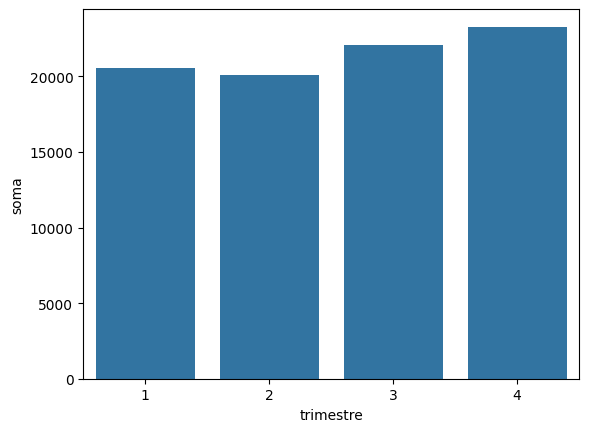

In [18]:
# Cria uma figura e um eixo para o gráfico
fig, ax = plt.subplots()

# Cria um gráfico de barras utilizando os dados do DataFrame 'df_2020_2', após redefinir o índice
# 'x' é a coluna 'trimestre' e 'y' é a coluna 'soma'
# 'ci=None' remove as barras de erro
# 'ax=ax' define o eixo onde o gráfico será plotado
sns.barplot(data=df_2020_2.reset_index(), x='trimestre', y='soma', ci=None, ax=ax)


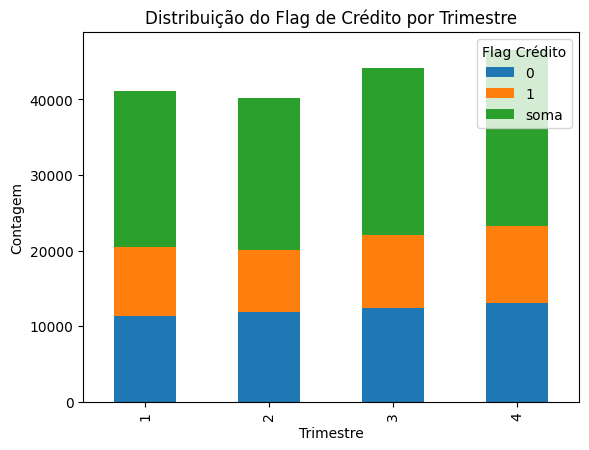

In [19]:
# Cria um gráfico de barras empilhadas para mostrar a distribuição do 'flag_credito' por trimestre
fig, ax = plt.subplots()
df_2020_2.reset_index().plot(kind='bar', x='trimestre', stacked=True, ax=ax)
plt.title('Distribuição do Flag de Crédito por Trimestre')
plt.ylabel('Contagem')
plt.xlabel('Trimestre')
plt.legend(title='Flag Crédito')
plt.show()


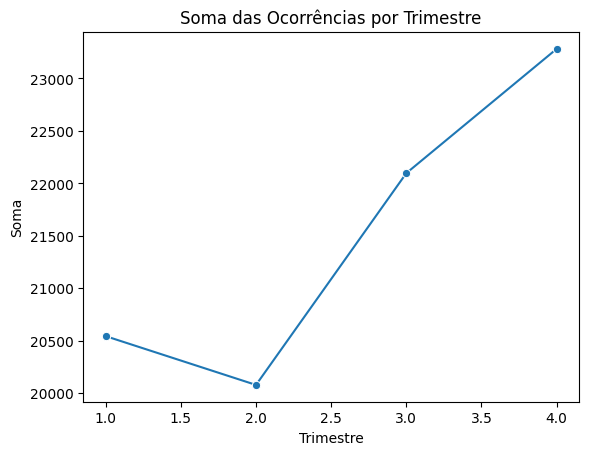

In [20]:
# Cria um gráfico de linha para mostrar a soma das ocorrências por trimestre
fig, ax = plt.subplots()
sns.lineplot(data=df_2020_2.reset_index(), x='trimestre', y='soma', marker='o', ax=ax)
plt.title('Soma das Ocorrências por Trimestre')
plt.ylabel('Soma')
plt.xlabel('Trimestre')
plt.show()


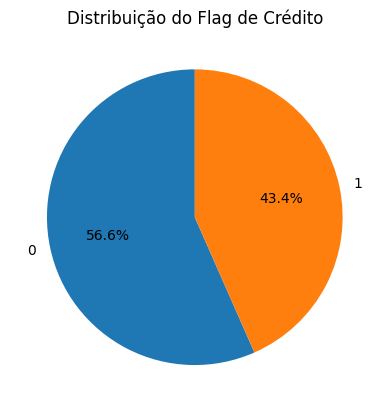

In [21]:
# Calcula a soma total de cada valor de 'flag_credito' para criar um gráfico de pizza
flag_credito_totals = df_2020.groupby('flag_credito').size()

# Cria um gráfico de pizza para mostrar a distribuição do 'flag_credito'
fig, ax = plt.subplots()
ax.pie(flag_credito_totals, labels=flag_credito_totals.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição do Flag de Crédito')
plt.show()


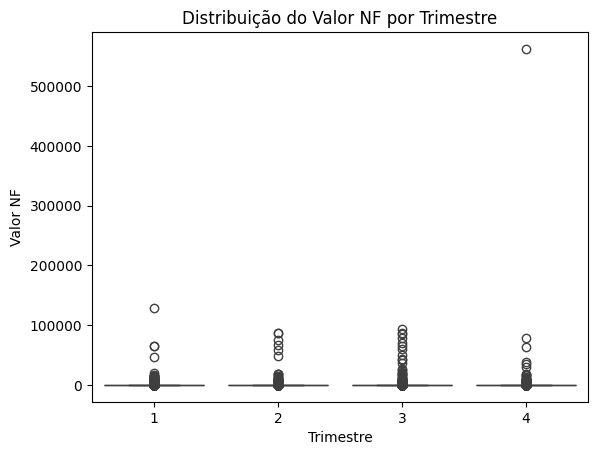

In [22]:
# Cria um gráfico de caixa para mostrar a distribuição do 'Valor NF' por trimestre
fig, ax = plt.subplots()
sns.boxplot(data=df_2020, x='trimestre', y='Valor NF', ax=ax)
plt.title('Distribuição do Valor NF por Trimestre')
plt.ylabel('Valor NF')
plt.xlabel('Trimestre')
plt.show()

In [23]:
# Agrupa o DataFrame 'df_2020' pelas colunas 'trimestre', 'categoria' e 'flag_credito'
# Conta o número de ocorrências para cada combinação utilizando 'size()'
# Usa 'unstack(fill_value=0)' para reorganizar o resultado em um DataFrame, preenchendo valores ausentes com 0
df_2020_3 = df_2020.groupby(['trimestre', 'categoria', 'flag_credito']).size().unstack(fill_value=0)

# Adiciona uma nova coluna 'soma' ao DataFrame 'df_2020_3', contendo a soma das ocorrências em cada linha
df_2020_3['soma'] = df_2020_3.sum(axis=1)

# Adiciona uma nova coluna 'tx_evento' ao DataFrame 'df_2020_3'
# Calcula a taxa de evento como a razão entre a contagem de eventos (flag_credito = 1) e a contagem de não eventos (flag_credito = 0)
df_2020_3['tx_evento'] = df_2020_3[1] / df_2020_3[0]

# Exibe as primeiras linhas do DataFrame 'df_2020_3' para verificar as novas colunas
df_2020_3.head()


flag_credito             0     1  soma  tx_evento
trimestre categoria                              
1         Alimentos    374   908  1282   2.427807
          Auto posto   118    34   152   0.288136
          Construção  2041  1811  3852   0.887310
          Farmácia    1794   638  2432   0.355630
          Mercado     3456  3271  6727   0.946470

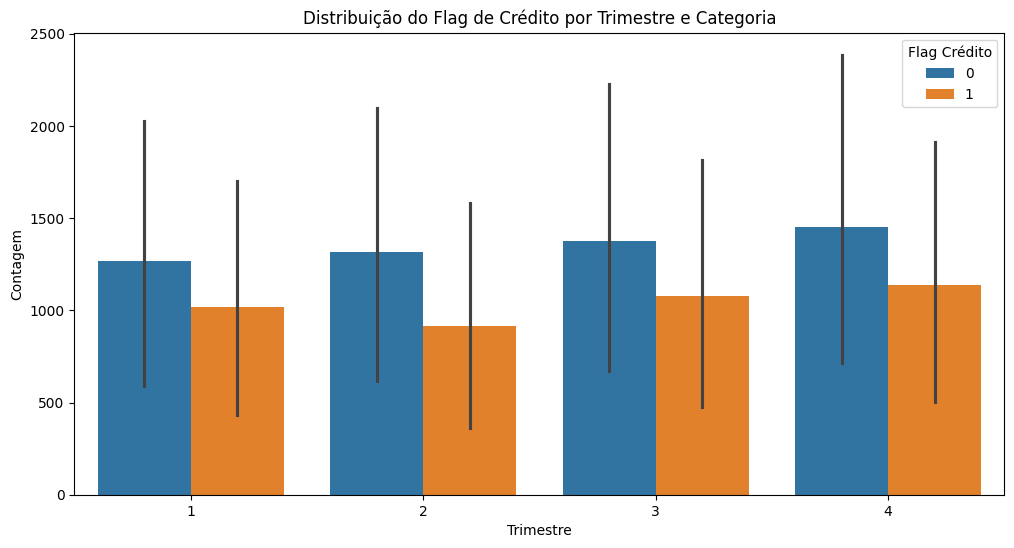

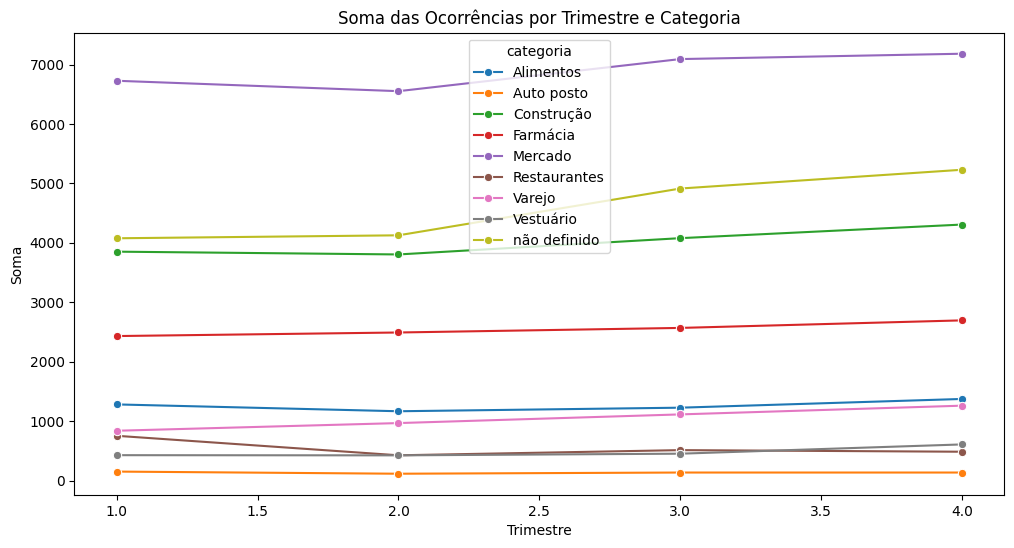

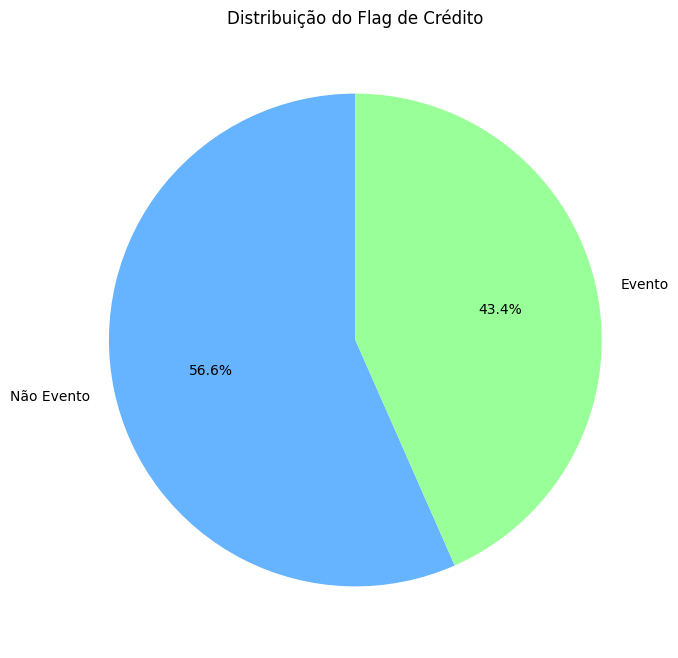

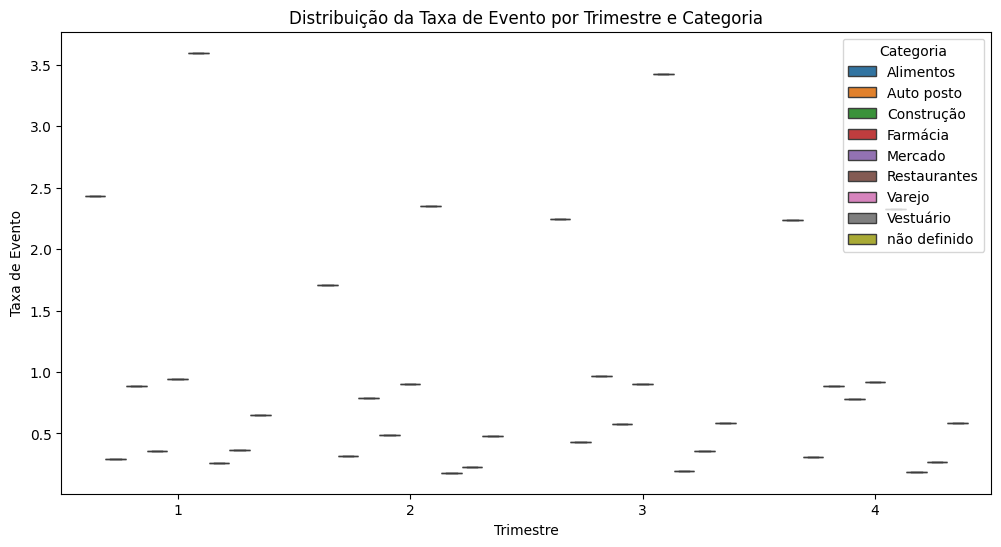

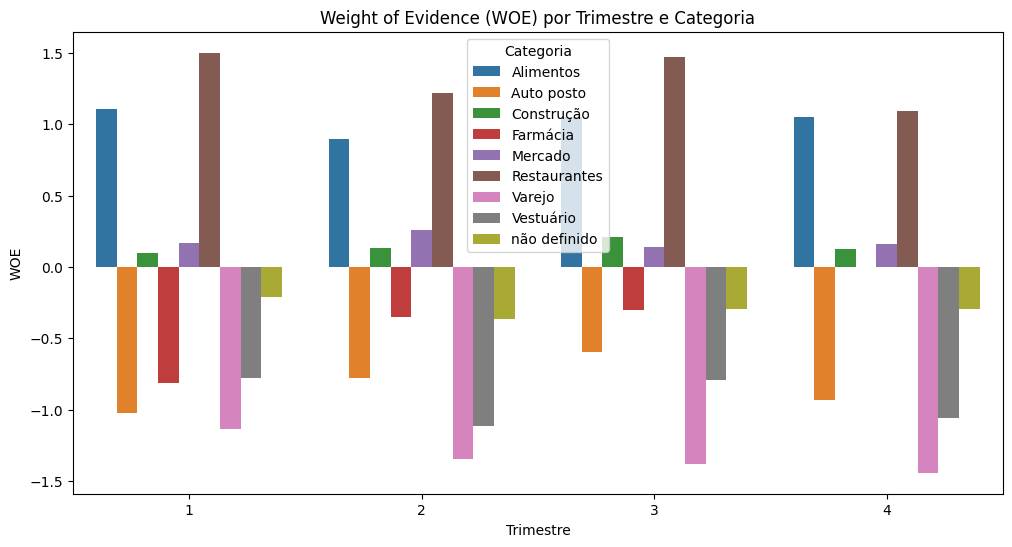

In [24]:
# Calcular as porcentagens de eventos e não eventos
df_2020_3['pct_evento'] = df_2020_3[1] / df_2020_3[1].groupby(level=0).sum()
df_2020_3['pct_nao_evento'] = df_2020_3[0] / df_2020_3[0].groupby(level=0).sum()

# Calcular o Weight of Evidence (WOE)
df_2020_3['WOE'] = np.log(df_2020_3.pct_evento / df_2020_3.pct_nao_evento)

# Verificar as primeiras linhas do DataFrame atualizado
df_2020_3.head()

# Gráfico de Barras Empilhadas para `flag_credito` por Trimestre e Categoria
df_2020_3.reset_index(inplace=True)
df_2020_3_melted = df_2020_3.melt(id_vars=['trimestre', 'categoria'], value_vars=[0, 1], var_name='flag_credito', value_name='count')

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=df_2020_3_melted, x='trimestre', y='count', hue='flag_credito', ax=ax)
ax.set_title('Distribuição do Flag de Crédito por Trimestre e Categoria')
ax.set_xlabel('Trimestre')
ax.set_ylabel('Contagem')
plt.legend(title='Flag Crédito')
plt.show()

# Gráfico de Linha para a Soma das Ocorrências por Trimestre e Categoria
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=df_2020_3, x='trimestre', y='soma', hue='categoria', marker='o', ax=ax)
ax.set_title('Soma das Ocorrências por Trimestre e Categoria')
ax.set_xlabel('Trimestre')
ax.set_ylabel('Soma')
plt.show()

# Gráfico de Pizza para Distribuição de `flag_credito` por Categoria
flag_credito_totals = df_2020_3[[0, 1]].sum()

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(flag_credito_totals, labels=['Não Evento', 'Evento'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])
ax.set_title('Distribuição do Flag de Crédito')
plt.show()

# Gráfico de Caixa para `tx_evento` por Trimestre e Categoria
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df_2020_3, x='trimestre', y='tx_evento', hue='categoria', ax=ax)
ax.set_title('Distribuição da Taxa de Evento por Trimestre e Categoria')
ax.set_xlabel('Trimestre')
ax.set_ylabel('Taxa de Evento')
plt.legend(title='Categoria')
plt.show()

# Gráfico de Barras para `WOE` por Trimestre e Categoria
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=df_2020_3, x='trimestre', y='WOE', hue='categoria', ax=ax)
ax.set_title('Weight of Evidence (WOE) por Trimestre e Categoria')
ax.set_xlabel('Trimestre')
ax.set_ylabel('WOE')
plt.legend(title='Categoria')
plt.show()


## Avalie o WOE e o IV no tempo

Avalie o WOE e o IV no tempo da variável ```categoria```.

Total de Eventos: 37318
Total de Não Eventos: 48682
flag_credito  pct_evento  pct_nao_evento       WOE
0               0.024331        0.007683  1.152822
1               0.000911        0.002424 -0.978491
2               0.048529        0.041925  0.146273
3               0.017096        0.036851 -0.768031
4               0.087652        0.070991  0.210817


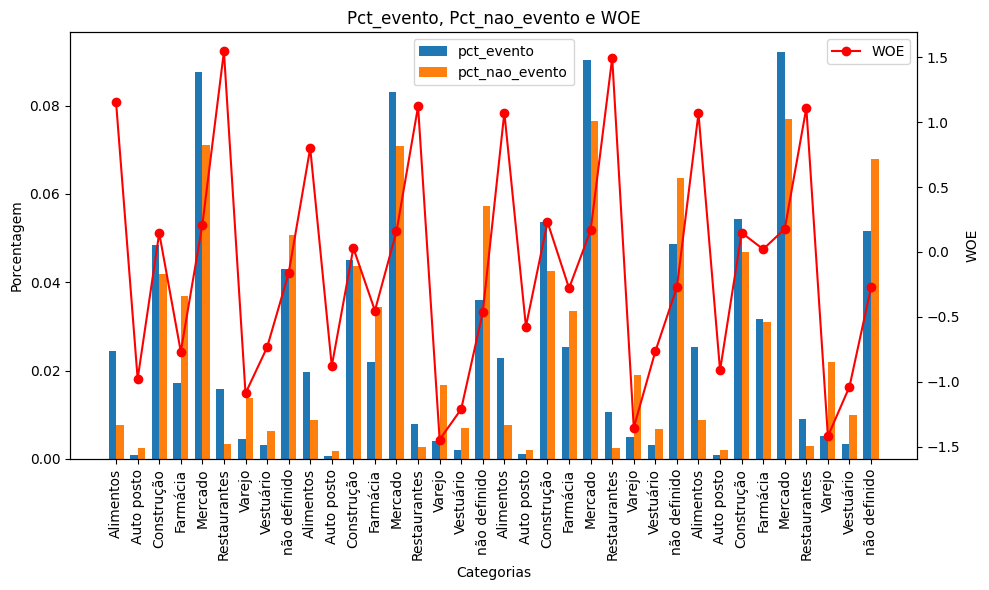

In [31]:
# Calcular os denominadores para pct_evento e pct_nao_evento
total_eventos = df_2020_3[1].sum()
total_nao_eventos = df_2020_3[0].sum()

# Calcular pct_evento e pct_nao_evento
df_2020_3['pct_evento'] = df_2020_3[1] / total_eventos
df_2020_3['pct_nao_evento'] = df_2020_3[0] / total_nao_eventos

# Calcular WOE
df_2020_3['WOE'] = np.log(df_2020_3['pct_evento'] / df_2020_3['pct_nao_evento'])

# Imprimir valores intermediários para verificar
print("Total de Eventos:", total_eventos)
print("Total de Não Eventos:", total_nao_eventos)
print(df_2020_3[['pct_evento', 'pct_nao_evento', 'WOE']].head())

# Passo 4: Criar os gráficos
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de barras para pct_evento e pct_nao_evento
bar_width = 0.35
index = np.arange(len(df_2020_3))

bar1 = ax1.bar(index, df_2020_3['pct_evento'], bar_width, label='pct_evento')
bar2 = ax1.bar(index + bar_width, df_2020_3['pct_nao_evento'], bar_width, label='pct_nao_evento')

ax1.set_xlabel('Categorias')
ax1.set_ylabel('Porcentagem')
ax1.set_title('Pct_evento, Pct_nao_evento e WOE')
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(df_2020_3['categoria'], rotation=90)
ax1.legend()

# Adicionar o gráfico de linhas para WOE
ax2 = ax1.twinx()
ax2.plot(index + bar_width / 2, df_2020_3['WOE'], color='r', marker='o', label='WOE')
ax2.set_ylabel('WOE')
ax2.legend(loc='upper right')

fig.tight_layout()
plt.show()


## Conclua

- Quais categorias parece ter maior proporção de notas com retornos maiores que zero?
- Essas diferenças são estáveis no tempo?

Dicas:<br>
- Considere que a quantidade de notas vem aumentando
- Considere que há períodos bem atípicos no histórico
- Considere que a partir de janeiro de 2020 o público é mais parecido com o público atual (2022), seja por pandemia, seja por crescimento do público, e considere os dados dessa data em diante na sua conclusão.

# Insights dos Resultados

## Disparidades entre `pct_evento` e `pct_nao_evento`

Para algumas categorias, como <span style="color:blue">**Alimentos**</span> e <span style="color:blue">**Construção**</span>, há uma diferença significativa entre `pct_evento` e `pct_nao_evento`. Isso indica que essas categorias têm características diferentes em termos de ocorrência de eventos e não eventos.

## Valores de WOE

O WOE nos ajuda a entender a força do relacionamento entre a variável categórica e a variável dependente (evento). Valores positivos indicam uma associação positiva, enquanto valores negativos indicam uma associação negativa.

Por exemplo, a categoria <span style="color:green">**Alimentos**</span> tem um WOE positivo alto, sugerindo que essa categoria é mais associada com eventos em comparação com outras categorias.

## Categorias com Padrões Claros

Algumas categorias, como <span style="color:purple">**Farmácia**</span> e <span style="color:purple">**Restaurantes**</span>, mostram padrões claros onde `pct_evento` é consistentemente maior ou menor do que `pct_nao_evento`, indicando uma tendência mais previsível dentro dessas categorias.

### Interpretação dos Resultados

### Identificação de Risco

- As categorias com WOE positivo e alto `pct_evento` (como <span style="color:orange">**Alimentos**</span>) podem ser consideradas de alto risco, pois estão associadas a uma maior ocorrência de eventos.
- Por outro lado, categorias com WOE negativo (como <span style="color:red">**Auto posto**</span>) indicam menor risco, pois estão associadas a menos eventos.

### Ações Estratégicas

- Para categorias de alto risco, pode ser necessário implementar medidas adicionais de monitoramento e controle para mitigar o risco.
- Categorias de baixo risco podem ser priorizadas para estratégias de retenção, visto que têm menor probabilidade de eventos adversos.

